In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

In [2]:
train_df = pd.read_csv("../input/digit-recognizer/train.csv")
test_df = pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = np.array(train_df['label'])
x_train = np.array(train_df.drop(['label'],axis = 1))

x_test = np.array(test_df)

In [5]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [6]:
x_train.shape

(42000, 784)

In [7]:
x_test.shape

(28000, 784)

In [8]:
data = x_train[0].reshape((28,28))

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [9]:
random.sample(range(len(x_train)),k=rows*cols)

NameError: name 'rows' is not defined

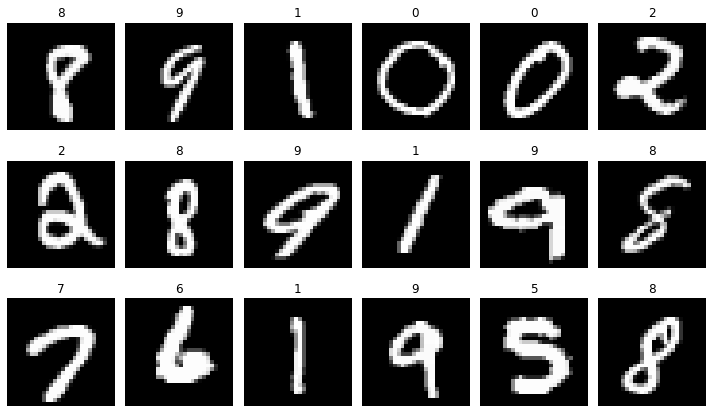

In [10]:

    
def plot_data(index):    
    data = x_train[index].reshape((28,28))
    label = y_train[index]
    plt.imshow(data,cmap='gray')
    plt.axis(False)
    plt.title(label)

rows, cols = 3,6

plt.figure(figsize=(10,6))
nums = random.sample(range(len(x_train)),k=rows*cols)

for i, num in enumerate(nums):
    plt.subplot(rows,cols,i+1 )
    plot_data(num)

plt.tight_layout()
plt.show()
plt.close()

In [11]:
x_train.max()

255

In [12]:
#0~255 -> 전체 데이터/255 하면 0~1
x_train = x_train / 255
x_test = x_test / 255

MLP

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, ReLU, Softmax, BatchNormalization

In [14]:
model = Sequential([
    Input(shape=(784)),
    Dense(16), BatchNormalization(), ReLU(), Dropout(0.2),
    Dense(16), BatchNormalization(), ReLU(), Dropout(0.2),
    Dense(10), Softmax()
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
re_lu (ReLU)                 (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16)                0

In [16]:
model.compile(
    optimizer = "adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"]
)

In [17]:
history = model.fit(x_train, y_train,batch_size=64,epochs=30, validation_split=0.2)

Epoch 1/30
525/525 [==============================] - 3s 3ms/step - loss: 1.5971 - sparse_categorical_accuracy: 0.4917 - val_loss: 0.4946 - val_sparse_categorical_accuracy: 0.8907
Epoch 2/30
525/525 [==============================] - 1s 2ms/step - loss: 0.7609 - sparse_categorical_accuracy: 0.7668 - val_loss: 0.3375 - val_sparse_categorical_accuracy: 0.9138
Epoch 3/30
525/525 [==============================] - 1s 2ms/step - loss: 0.6398 - sparse_categorical_accuracy: 0.7991 - val_loss: 0.3041 - val_sparse_categorical_accuracy: 0.9176
Epoch 4/30
525/525 [==============================] - 1s 2ms/step - loss: 0.5976 - sparse_categorical_accuracy: 0.8132 - val_loss: 0.2820 - val_sparse_categorical_accuracy: 0.9206
Epoch 5/30
525/525 [==============================] - 1s 2ms/step - loss: 0.5690 - sparse_categorical_accuracy: 0.8235 - val_loss: 0.2732 - val_sparse_categorical_accuracy: 0.9226
Epoch 6/30
525/525 [==============================] - 1s 2ms/step - loss: 0.5414 - sparse_categorica

In [18]:
history.history['loss']


[1.218401551246643,
 0.7205772399902344,
 0.6354175806045532,
 0.5837388634681702,
 0.5597941279411316,
 0.5363357663154602,
 0.5222092866897583,
 0.5144146084785461,
 0.5040107369422913,
 0.4935015141963959,
 0.48644229769706726,
 0.4791814684867859,
 0.47682899236679077,
 0.46748629212379456,
 0.464006632566452,
 0.45944008231163025,
 0.45806223154067993,
 0.4522453844547272,
 0.45153793692588806,
 0.44254589080810547,
 0.44467759132385254,
 0.4420875012874603,
 0.43212851881980896,
 0.44216272234916687,
 0.43832525610923767,
 0.43090856075286865,
 0.4295949935913086,
 0.4274190366268158,
 0.42673203349113464,
 0.42797109484672546]

In [19]:
train_loss = history.history['loss']
train_acc = history.history['sparse_categorical_accuracy']

valid_loss  = history.history['loss']
valid_acc = history.history['sparse_categorical_accuracy']

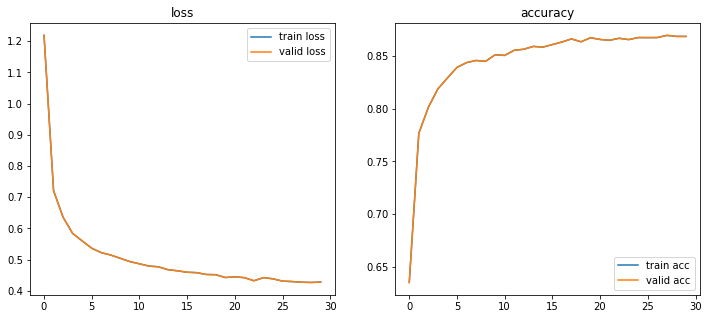

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_loss, label ="train loss")
plt.plot(valid_loss, label="valid loss")
plt.title('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc, label ="train acc")
plt.plot(valid_acc, label="valid acc")
plt.title("accuracy")
plt.legend()

plt.show()
plt.close()

In [21]:
predictions = model.predict(x_test)


In [22]:
pred = np.argmax(predictions,axis=1)

In [23]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [24]:
sub = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sub["Label"] = pred

In [25]:
sub.to_csv('mnist-20210208.csv',index=False)